<a href="https://colab.research.google.com/github/mjmousavi97/Graph-Neural-Networks/blob/main/07_Vanilla_Neural_Networks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Graph Datasets (Chapter Intro)
- Two graph dataset are used in this chapter:  
  - **Cora dataset**  


### Cora Dataset
- Introduced by Sen et al. (2008).  
- Most popular dataset for **node classification**.  
- Contains **2,708 publications** (each node = one paper).  
- Edges represent **citations** between papers.  
- Each paper is described as a **1433-dimensional binary vector** of unique words (binary bag of words).  
- Goal: classify each paper into **7 categories**.  

### Visualization
- Graphs can be too large for libraries like **networkx**.  
- Common visualization tools:  
  - **yEd Live** → [https://www.yworks.com/yed-live/](https://www.yworks.com/yed-live/)  
  - **Gephi** → [https://gephi.org/](https://gephi.org/)  
- In visualizations:  
  - Nodes (papers) are shown in **orange**.  
  - Edges (citations) are shown in **green**.  
- Highly interconnected papers form **clusters**, which are easier to classify than sparsely connected nodes.  


Let’s import it and analyze its main characteristics with PyTorch Geometric. This library has a dedicated
class to download the dataset and return a relevant data structure.

In [2]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.1 MB/s eta 0:00:00


In [3]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='data/Planetoid', name='Cora')

Processing...
Done!


In [4]:
data = dataset[0]

information about the dataset in general:

In [ ]:
print(f'Dataset: {dataset}')
print('---------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of node features: {data.num_node_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Dataset: Cora()
---------------
Number of graphs: 1
Number of nodes: 2708
Number of edges: 10556
Number of node features: 1433
Number of classes: 7
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


In [ ]:
# Convert torch data to networkx graph
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

G = to_networkx(data, to_undirected=True)

# Save networkx graph
nx.write_graphml(G, "cora.graphml")


# Key Points: Classifying Nodes with Vanilla Neural Networks

- Unlike Zachary’s Karate Club dataset, datasets like **Cora** include **node features** (e.g., age, gender, interests).
- Node features are treated as a **tabular dataset** for classification.
- A **vanilla neural network (MLP)** can directly use these features for node classification.
- This approach **does not use graph topology** (connections between nodes).
- In later steps, we will incorporate the graph structure to improve performance and compare results.


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data.x.numpy())
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['label'] = pd.DataFrame(data.y.numpy())
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Columns: 1434 entries, 0 to label
dtypes: float32(1433), int64(1)
memory usage: 14.8 MB


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,label
count,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,...,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000
mean,0.005908,0.012186,0.025849,0.026588,0.060931,0.002585,0.010709,0.002954,0.011817,0.002216,...,0.026219,0.017356,0.042097,0.010340,0.001108,0.012555,0.002216,0.024003,0.004431,2.873338
std,0.076654,0.109737,0.158714,0.160904,0.239247,0.050786,0.102947,0.054282,0.108080,0.047027,...,0.159812,0.130618,0.200847,0.101176,0.033272,0.111367,0.047027,0.153086,0.066433,1.679925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [ ]:
df['label'].value_counts()

,count
label,
3,818
4,426
2,418
0,351
5,298
1,217
6,180


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

In [ ]:
def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.hidden_layer = nn.Linear(input_dim, hidden_dim)
        self.output_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.hidden_layer(x)
        x = F.relu(x)
        x = self.output_layer(x)
        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs=100, lr=0.01, weight_decay=5e-4):
        self.train()
        optimizer = torch.optim.Adam(self.parameters(), lr=lr, weight_decay=weight_decay)
        loss_fn = nn.CrossEntropyLoss()

        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x)
            loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                val_loss = loss_fn(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Acc: {acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = accuracy(out[data.test_mask].argmax(dim=1), data.y[data.test_mask])
        return acc


In [ ]:
model = MLP(input_dim=dataset.num_features, hidden_dim=16, output_dim=dataset.num_classes)
print(model)

MLP(
  (hidden_layer): Linear(in_features=1433, out_features=16, bias=True)
  (output_layer): Linear(in_features=16, out_features=7, bias=True)
)


In [ ]:
model.fit(data, epochs=100)

Epoch: 000, Loss: 1.9586, Acc: 0.1357, Val Loss: 2.0242, Val Acc: 0.0720
Epoch: 020, Loss: 0.0999, Acc: 1.0000, Val Loss: 1.5628, Val Acc: 0.5000
Epoch: 040, Loss: 0.0115, Acc: 1.0000, Val Loss: 1.6031, Val Acc: 0.5060
Epoch: 060, Loss: 0.0068, Acc: 1.0000, Val Loss: 1.6116, Val Acc: 0.4880
Epoch: 080, Loss: 0.0079, Acc: 1.0000, Val Loss: 1.4925, Val Acc: 0.5060
Epoch: 100, Loss: 0.0087, Acc: 1.0000, Val Loss: 1.4318, Val Acc: 0.5160


In [ ]:
acc = model.test(data)
print(f'Test accuracy: {acc:.4f}')

Test accuracy: 0.5230


___

In [ ]:
class VanillaGNNLayer(nn.Module):
    def __init__(self, input_dim, output_dim, bias=False):
        super().__init__()

        self.linear = nn.Linear(input_dim, output_dim, bias=bias)

    def forward(self, x, adj):
        out = self.linear(x)
        out = torch.mm(adj, out)
        return out

In [ ]:
edge_index = data.edge_index

from torch_geometric.utils import to_dense_adj
adj = to_dense_adj(edge_index)[0]

In [ ]:
print(adj.shape)
adj

torch.Size([2708, 2708])


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 1., 0.]])

In [ ]:
class VanillaGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.gnn1 = VanillaGNNLayer(input_dim, hidden_dim)
        self.gnn2 = VanillaGNNLayer(hidden_dim, output_dim)

    def forward(self, adj, x):
        out = self.gnn1(x, adj)
        out = F.relu(out)
        out = self.gnn2(out, adj)
        return F.log_softmax(out, dim=1)

    def fit(self, data, adjacency, epochs=100, lr=0.01, weight_decay=5e-4):
        self.train()
        optimizer = torch.optim.Adam(self.parameters(), lr=lr, weight_decay=weight_decay)
        loss_fn = nn.CrossEntropyLoss()

        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(adjacency, data.x)
            loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                val_loss = loss_fn(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Acc: {acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    @torch.no_grad
    def test(self, data, adjacency):
        self.eval()
        out = self(adjacency, data.x)
        acc = accuracy(out[data.test_mask].argmax(dim=1), data.y[data.test_mask])
        return acc

In [ ]:
GNN = VanillaGNN(input_dim=dataset.num_features, hidden_dim=16, output_dim=dataset.num_classes)
print(GNN)

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=1433, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=7, bias=False)
  )
)


In [ ]:
GNN.fit(data, adj, epochs=100)

Epoch: 000, Loss: 2.1078, Acc: 0.1786, Val Loss: 2.0278, Val Acc: 0.2140
Epoch: 020, Loss: 0.1011, Acc: 1.0000, Val Loss: 2.0623, Val Acc: 0.7460
Epoch: 040, Loss: 0.0208, Acc: 1.0000, Val Loss: 3.0565, Val Acc: 0.7160
Epoch: 060, Loss: 0.0072, Acc: 1.0000, Val Loss: 3.4474, Val Acc: 0.7120
Epoch: 080, Loss: 0.0043, Acc: 1.0000, Val Loss: 3.4445, Val Acc: 0.7060
Epoch: 100, Loss: 0.0035, Acc: 1.0000, Val Loss: 3.3630, Val Acc: 0.7160


___

## 🔑 Key Takeaways: GNN vs. GCN Normalization

The core difference between a simple **Vanilla GNN** and a **Graph Convolutional Network (GCN)** lies in how they handle **node degrees** (the number of neighbors).

### 1. The Necessity of Normalization (The Problem & Solution)

| Architecture | Aggregation Method | Problem (The Why) | Solution (The GCN Fix) |
| :--- | :--- | :--- | :--- |
| **Vanilla GNN** | **Simple Summation** ($\sum$) | High-degree nodes receive **artificially large** embeddings, making magnitudes incomparable across the graph. | **GCN Normalization** |
| **GCN** | **Normalization/Averaging** ($\frac{1}{\text{deg}(i)}\sum$) | **—** | Ensures node embeddings are **comparable** by averaging features, rather than summing them. |

### 2. Condition for GCN Superiority

The GCN's advantage is only significant when the dataset exhibits **high variability in node degrees**.

* **High Variability (e.g., social networks):** GCN is crucial. Its normalization prevents high-degree nodes from dominating the feature aggregation.
* **Low Variability (e.g., constant degree $C$):** GCN and the Vanilla GNN become **mathematically equivalent**. The normalization factor $\frac{1}{C}$ is just a constant scale that the weight matrix ($W$) can absorb during training.

### 3. Matrix Implementation

The node-level normalization $\frac{1}{\text{deg}(i)}$ is implemented across the entire graph using the **Inverse Degree Matrix ($D^{-1}$)**, which is a diagonal matrix containing the reciprocal of each node's degree on its diagonal:

$$\mathbf{H} = \mathbf{D}^{-1} \tilde{\mathbf{A}} \mathbf{X} \mathbf{W}^T$$

In [14]:
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import degree
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch
from torch.nn import functional as F

In [11]:
dataset = Planetoid(root='data/Planetoid', name='Cora')
data = dataset[0]

In [6]:
data.edge_index

tensor([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
        [   0,    0,    0,  ..., 2707, 2707, 2707]])

In [13]:
# nodes, degrees = np.unique(data.edge_index[0].numpy(), return_counts=True)

# num = 0
# for node, degree in zip(nodes, degrees):
#     print(f'Node {node}: {degree} edges')
#     num += 1
#     if num == 10:
#         break


In [7]:
degrees = degree(data.edge_index[0]).numpy()
degrees

array([3., 3., 5., ..., 1., 4., 4.], dtype=float32)

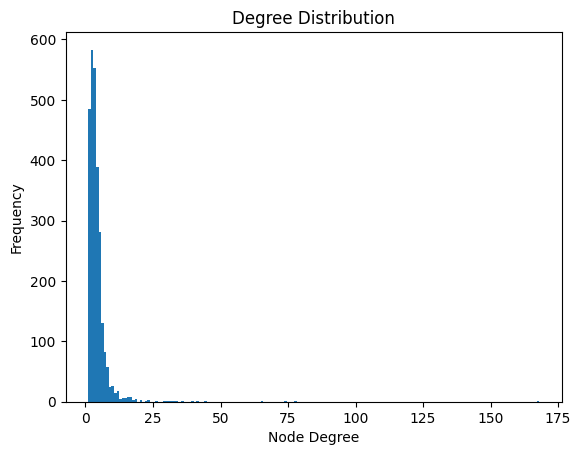

In [17]:
plt.hist(degrees, bins=175)
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

# We create a GCN class with a __init_() function that takes three parameters as input:
the number of input dimensions, dim_in, the number of hidden dimensions, dim_h, and the number of output dimensions, dim_out:

In [8]:
from torch_geometric.nn import GCNConv

In [18]:
def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)

In [20]:
class GCN(nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()

        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_out)

    def forward(self, x, edge_index):
        x = self.gcn1(x, edge_index)
        x = F.relu(x)
        x = self.gcn2(x, edge_index)
        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs=100, lr=0.01, weight_decay=5e-4):
        loss_fn = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=lr, weight_decay=weight_decay)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self.forward(data.x, data.edge_index)
            loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                val_loss = loss_fn(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Acc: {acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    @torch.no_grad()
    def test(self, data):
        self.eval()

        out = self.forward(data.x, data.edge_index)
        acc = accuracy(out[data.test_mask].argmax(dim=1), data.y[data.test_mask])
        return acc



In [21]:
gcn_model = GCN(dim_in=dataset.num_features, dim_h=16, dim_out=dataset.num_classes)
print(gcn_model)

GCN(
  (gcn1): GCNConv(1433, 16)
  (gcn2): GCNConv(16, 7)
)


In [22]:
gcn_model.fit(data, epochs=100)

Epoch: 000, Loss: 1.9410, Acc: 0.1500, Val Loss: 1.9546, Val Acc: 0.0940
Epoch: 020, Loss: 0.1293, Acc: 1.0000, Val Loss: 0.8374, Val Acc: 0.7400
Epoch: 040, Loss: 0.0174, Acc: 1.0000, Val Loss: 0.7977, Val Acc: 0.7400
Epoch: 060, Loss: 0.0164, Acc: 1.0000, Val Loss: 0.7755, Val Acc: 0.7540
Epoch: 080, Loss: 0.0185, Acc: 1.0000, Val Loss: 0.7586, Val Acc: 0.7640
Epoch: 100, Loss: 0.0168, Acc: 1.0000, Val Loss: 0.7494, Val Acc: 0.7620


In [23]:
acc = gcn_model.test(data)
print(f'Test accuracy: {acc:.4f}')

Test accuracy: 0.8020
